# Tensorflow Ex-7 Part-2

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [25]:
x_data = np.linspace(0.0,10.0,1000000)

In [26]:
noise = np.random.randn(len(x_data))

In [27]:
x_data
noise

array([-0.19476616,  0.32760682,  0.37862348, ...,  0.38547115,
       -0.45415098,  1.59140492])

In [28]:
#y = mx + b, b = 5
y_true = (0.5 * x_data) + 5 + noise

In [29]:
x_df = pd.DataFrame(data = x_data, columns=['X_Data'])

In [30]:
y_df = pd.DataFrame(data = y_true, columns=['Y'])

In [31]:
x_df.head()
y_df.head()

,Y
0,4.805234
1,5.327612
2,5.378633
3,4.789303
4,5.347584


In [32]:
my_data = pd.concat([x_df,y_df],axis=1)

In [33]:
my_data.head()

,X_Data,Y
0,0.00000,4.805234
1,0.00001,5.327612
2,0.00002,5.378633
3,0.00003,4.789303
4,0.00004,5.347584


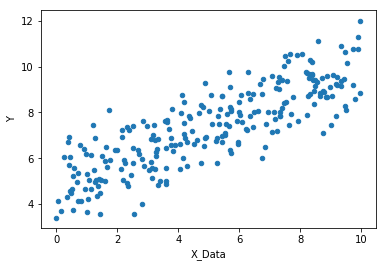

In [34]:
my_data.sample(n=250).plot(kind = 'scatter',x='X_Data', y = 'Y')

In [35]:
batch_size = 8

In [36]:
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [37]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [38]:
#model
y_model = m*xph + b

In [39]:
#Cost Funtion
error = tf.reduce_sum(tf.square(yph-y_model))

In [40]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [41]:
init = tf.global_variables_initializer()

In [42]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train,feed_dict = feed)
    model_m, model_b = sess.run([m,b])

In [43]:
model_m

0.5075829

In [44]:
model_b

4.992003

In [45]:
y_hat = x_data * model_m + model_b

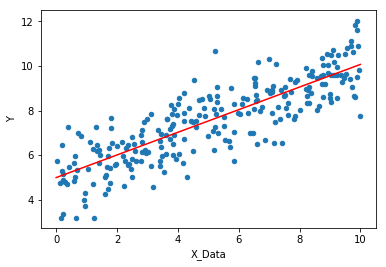

In [46]:
my_data.sample(n=250).plot(kind = 'scatter',x='X_Data', y = 'Y')
plt.plot(x_data,y_hat,'r')